In [1]:
import Algos
#from Algos import ANN as t
#from Algos import PolynomialFeatures as t
#from Algos import RandomForest as t
#from Algos import RNN as t
#from Algos import CausalDiscovery as t
from Algos import TCN as t

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2025-04-29 10:40:01.531767: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 10:40:01.542504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-29 10:40:01.556105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-29 10:40:01.560038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 10:40:01.570610: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Read the time series data for a specific building (Building_1) from a CSV file using pandas' read_csv function.
# The file likely contains information such as electricity consumption, production, or related metrics for Building 1.
electricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")

# Print the electricity data to the console for inspection.
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [3]:
# Read the carbon intensity data from a CSV file using pandas' read_csv function.
# The file likely contains data on carbon intensity over time, which may refer to the amount of carbon dioxide emitted per unit of energy.
carbon_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Print the carbon intensity data to the console for inspection.
print(carbon_data)

     carbon_intensity
0            0.402488
1            0.382625
2            0.369458
3            0.367017
4            0.374040
..                ...
715          0.465811
716          0.470324
717          0.462414
718          0.448648
719          0.428057

[720 rows x 1 columns]


In [4]:
# Read the pricing data from a CSV file named "pricing.csv" using pandas' read_csv function.
# The file is expected to contain pricing information relevant to the CityLearn Challenge 2023.
pricing_data = pd.read_csv("citylearn_challenge_2023_phase_1/pricing.csv")

# Print the contents of the pricing data to the console for inspection.
print(pricing_data)

     electricity_pricing  electricity_pricing_predicted_6h  \
0                0.02893                           0.02893   
1                0.02893                           0.02915   
2                0.02893                           0.02915   
3                0.02893                           0.02915   
4                0.02893                           0.02915   
..                   ...                               ...   
715              0.02893                           0.02893   
716              0.02893                           0.02893   
717              0.02893                           0.02893   
718              0.02893                           0.02893   
719              0.02893                           0.02893   

     electricity_pricing_predicted_12h  electricity_pricing_predicted_24h  
0                              0.02915                            0.02893  
1                              0.02915                            0.02893  
2                          

In [5]:
# Read the weather data from a CSV file named "weather.csv" using pandas' read_csv function.
# The file is expected to contain weather information relevant to the CityLearn Challenge 2023.
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")

# Print the contents of the weather data to the console for inspection.
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [6]:
# Concatenate multiple datasets along the columns (axis=1) to create a single dataset.
# The datasets being combined are:
# - electricity_data: Data related to the building's time series data.
# - carbon_data: Data related to carbon emissions or levels.
# - pricing_data: Data related to pricing (could be electricity or carbon pricing).
# - weather_data: Data related to weather conditions.
# The resulting dataset will contain all the columns from these individual datasets.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Print the combined dataset to the console to inspect the data.
print(df)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [7]:
target = 'cooling_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
            'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 
            'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 
            'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 
            'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature', 
            'outdoor_relative_humidity', 'diffuse_solar_irradiance', 
            'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h', 
            'outdoor_dry_bulb_temperature_predicted_12h', 
            'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 
            'outdoor_relative_humidity_predicted_12h', 
            'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 
            'diffuse_solar_irradiance_predicted_12h', 
            'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 
            'direct_solar_irradiance_predicted_12h', 
            'direct_solar_irradiance_predicted_24h']

In [10]:
#real, pred = t.ANN(df, features, target)
#real, pred = t.Polynomial(df, features, target, 5)
#real, pred = t.RandomForest(df, features, target)
#real, pred = t.RNN(df, target, 24)
#real, pred = t.CausalDiscovery(df, target,1,0)
real, pred = t.TCN(df, -1,features, target,64,3,168,24)

(337, 168)
(337,)
(85, 168)
(85,)
Epoch 1/150


/home/enrico/anaconda3/envs/Casual/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - loss: 13.3124 - mean_absolute_error: 2.9553 - val_loss: 12.0523 - val_mean_absolute_error: 2.9736 - learning_rate: 0.0010
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.0638 - mean_absolute_error: 3.3488 - val_loss: 12.6055 - val_mean_absolute_error: 3.0683 - learning_rate: 0.0010
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7856 - mean_absolute_error: 2.0526 - val_loss: 11.8234 - val_mean_absolute_error: 2.9512 - learning_rate: 0.0010
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6121 - mean_absolute_error: 1.1950 - val_loss: 11.8237 - val_mean_absolute_error: 2.9474 - learning_rate: 0.0010
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2192 - mean_absolute_error: 0.8460 - val_loss: 11.6759 - val_mean_absolute_error: 2.9208 - learning_rate: 0.0010
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9134 - mean_absolute_error: 0.7197 - val_loss: 11.3912 - val_mean_absolute_er

106
106


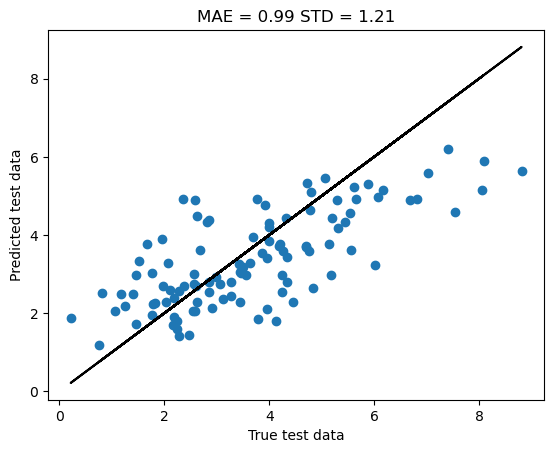

In [11]:
# Plot a scatter plot of the true test data against the predicted values.
# - The scatter plot shows the relationship between the actual values and the predicted values.
# - The title of the plot displays the Standard Deviation and the Mean Absolute Error (MAE).
print(real.size)
print(pred.size)
plt.scatter(real, pred)
plt.title(r"MAE = %.2f" % (np.abs(real - pred).mean()) + r" STD = %.2f" % np.std(real-pred))

# Plot a reference line where predicted values equal true values (y = x).
# This line helps to visualize how well the predicted values match the true values.
plt.plot(real, real, 'k-')

# Label the x-axis as 'True test data' and the y-axis as 'Predicted test data'.
plt.xlabel('True test data')
plt.ylabel('Predicted test data')

# Display the plot to the user.
plt.show()